# Анализ и исследование данных сервиса аренды самокатов

**Целью является предобработка полученных данных и проверка следующих гипотез:**  
1. Тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки.
2. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

#### Шаг 1. Загрузка данных

**Импортируем все необходимые библиотеки для анализа данных**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom, norm
from math import sqrt

**Загрузим данные и сохраним их в переменные**

In [2]:
def load_data(filename):
    try:
        return pd.read_csv(f'C:/Users/mmeln/projects/Statistics/{filename}')
    except FileNotFoundError:
        return pd.read_csv(f'/datasets/{filename}')

rides = load_data('rides_go.csv')
subscriptions = load_data('subscriptions_go.csv')
users = load_data('users_go.csv')

**Выведем первые 20 строк таблицы с пользователями**

In [3]:
users.head(20)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


**Изучим общую информацию**

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


**Выведем первые 20 строк таблицы с поездками**

In [5]:
rides.head(20)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


**Изучим общую информацию**

In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


**Выведем таблицу с подписками**

In [7]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Изучим общую информацию**

In [8]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод:**  

На первом шаге были считаны CSV-файлы с данными с помощью библиотеки pandas и сохранены в датафреймы:  

    - Пользователи - users;
    - Поездки - rides;
    - Подписки - subscriptions.  
    
При первичном осмотре данных, было выявлено следующее:  

    1. Cтолбец `date` в таблице `rides` имеет тип данных `object`. Необходимо преобразовать в тип дата. 
    2. Пропуски в данных, по полученной информации, с помощью метода `info()`, не обнаружены.

#### Шаг 2. Предобработка данных

**2.1 В таблице `rides` столбец `date` имеет тип данных object. Преобразуем тип в столбце в тип дата.**

In [9]:
# Пример даты 2021-01-01
rides['date'] =  pd.to_datetime(rides['date'], format='%Y-%m-%d')
# Выведем первые пять строк датафрейма
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


**Проверим, изменился ли тип в столбце `date`**

In [10]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


**2.2 Создадим новый столбец с номером месяца на основе столбца date.**

In [11]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Посмотрим за какой период имеются данные**

In [12]:
rides['date'].min(), rides['date'].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-30 00:00:00'))

*Период, за который берутся данные, составляет 12 месяцев в 2021 году.*

**2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах**

**Проверим количество пропущенных значений для каждого датафрейма**

In [13]:
#Выведим количество пропущенных значений для каждого столбца в таблице с пользователями
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
#Выведим уникальные значения столбца `city` в таблице users
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [15]:
#Выведим количество пропущенных значений для каждого столбца в таблице с поездками
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [16]:
#Выведим количество пропущенных значений для каждого столбца в таблице с подписками
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**В результате проверки пропущенных значений методом `isna` и `sum`, выявлено, что пропущенных значений в данных нет. Идем дальше. Посмотрим есть ли дубликаты в данных.**

**Найдем общее количество строк дубликатов в самом датафрейме**

In [17]:
#Общее количество строк дубликатов в таблице с поездками
rides.duplicated().sum()

0

In [18]:
#Общее количество строк дубликатов в таблице с пользователями
users.duplicated().sum()

31

In [19]:
#Выведим уникальные значения столбца `subscription` в таблице users
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

In [20]:
#Общее количество строк дубликатов в таблице с подписками
subscriptions.duplicated().sum()

0

**Удалим дублирующие строки из таблицы `users` и обновим индексы таблицы**

In [21]:
users = users.drop_duplicates().reset_index(drop=True)
#Проверим удалились ли все дубликаты строк
users.duplicated().sum()

0

**Вывод:**  
В ходе предобработки данных выполнены следующие операции:  
    1. Проверены столбцы таблиц на наличие пропущенных значений. Пропуски не обнаружены.  
    2. Проведен поиск дубликатов. Дубликаты строк найдены только в таблице users и удалены.  
    3. В таблице `rides` столбец `date` преобразован в тип дата.
    4. Проверен период, за который берутся данные. Он составляет 12 месяцев в 2021 году.

#### Шаг 3. Исследовательский анализ данных

**3.1 Визуализируем частоту встречаемости городов из таблицы `users`**

**Создадим таблицу с групированными значениями по городам. Также посчитаем их количество в таблице users**

In [22]:
users_cities = users['city'].value_counts()
users_cities

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

**Построим столбчатую диаграмму**

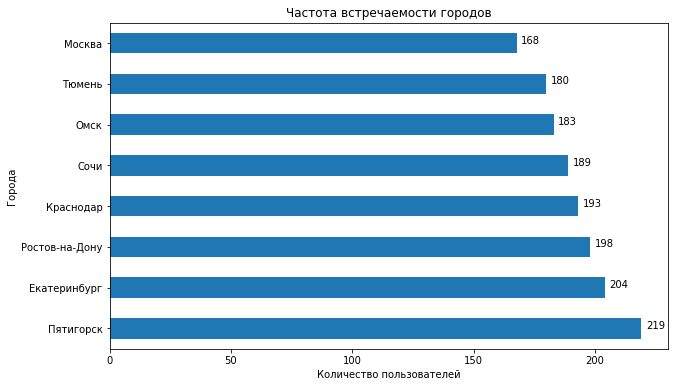

In [23]:
# Построение столбчатой диаграммы
ax = users_cities.plot(kind='barh', title='Частота встречаемости городов', figsize=(10, 6));
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Города')
# Добавление количества над каждым столбцом
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.01, p.get_y() + p.get_height() / 2))
plt.show()

**Исследуем соотношение пользователей с подпиской и без**

In [24]:
users_grouped_by_subscription = users['subscription_type'].value_counts()
users_grouped_by_subscription

free     835
ultra    699
Name: subscription_type, dtype: int64

**Визуализируем соотношение пользователей по типу подписки**

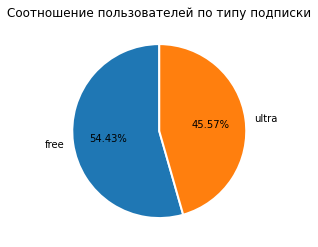

In [25]:
users_grouped_by_subscription.plot(kind='pie', 
                                   autopct='%1.2f%%', 
                                   startangle=90, 
                                   ylabel='',
                                   wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
                                   title='Соотношение пользователей по типу подписки'
                                  );

**Исследуем возраст пользователей**

In [26]:
users['age'].value_counts().sort_index()

12      4
13      8
14      9
15     13
16     19
17     26
18     46
19     47
20     71
21     93
22    119
23    129
24    132
25    145
26    131
27    119
28    112
29     68
30     68
31     48
32     41
33     39
34     19
35     15
36      6
37      2
38      3
39      1
43      1
Name: age, dtype: int64

In [27]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

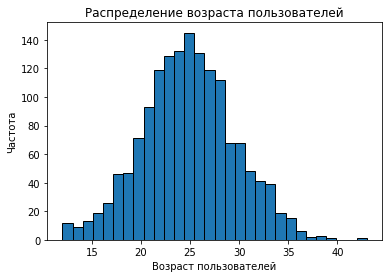

In [28]:
users['age'].plot(kind='hist', bins=30, title='Распределение возраста пользователей', edgecolor='black', xlabel='Возраст пользователей');
plt.xlabel('Возраст пользователей')
plt.ylabel('Частота')
plt.show()

**Исследуем расстояние, которое пользователь преодолел за одну поездку**

In [29]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

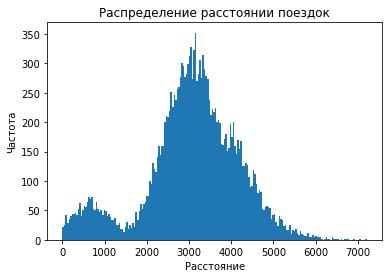

In [30]:
rides['distance'].plot(kind='hist',
                      title='Распределение расстоянии поездок',
                      bins=200
                      );
plt.xlabel('Расстояние')
plt.ylabel('Частота')
plt.show()

**Исследуем продолжительность, которую пользователь преодолел за одну поездку**

In [31]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

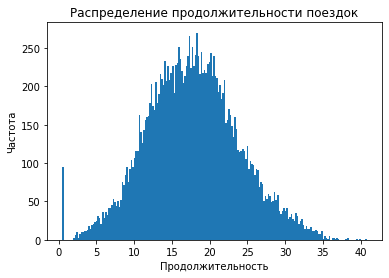

In [32]:
rides['duration'].plot(kind='hist',
                      title='Распределение продолжительности поездок',
                      bins=200
                      );
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.show()

**По гистаграммам продолжительности сессии и расстоянии, видно, что есть очень маленькие значения. Рассортируем таблицу `rides` по столбцу `duration` и посмотрим, какое расстояние, значения в столбце `distance`, проезжали пользователи за короткие промежутки времени**

In [33]:
rides.sort_values(by='duration', ascending=True).head(20)

,user_id,distance,duration,date,month
12013,1102,4602.122401,0.5,2021-08-01,8
17314,1483,4445.481070,0.5,2021-03-06,3
15029,1318,5894.633314,0.5,2021-03-28,3
7437,766,4539.088310,0.5,2021-12-22,12
12967,1172,4907.140751,0.5,2021-12-19,12
15015,1317,4593.389022,0.5,2021-07-16,7
13012,1176,4935.071045,0.5,2021-05-14,5
7508,772,4718.820996,0.5,2021-05-22,5
16589,1428,5059.187375,0.5,2021-05-06,5
9049,890,4848.485014,0.5,2021-11-20,11


**Отфильтруем таблицу `rides` по условию `duration` < 1**

In [34]:
rides_quick = rides.query('duration < 1')
rides_quick.head()

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2


**Посмотрим на параметры `distance` в таблице `rides_quick`**

In [35]:
rides_quick['distance'].describe()

count      95.000000
mean     5113.176549
std       658.254104
min      4030.308008
25%      4611.510820
50%      5052.769411
75%      5488.459099
max      7211.007745
Name: distance, dtype: float64

*В таблице `rides_quick` содержатся данные о поездках продолжительностью меньше 1 минуты. Посмотрев поподробнее на значения расстояния поездок, в данной таблице, обнаружено, что минимальное расстояние за меньше чем в 1 минуту составляет 4030м. Скорее всего это ошибки в данных.*

**Вывод:**  
Проанализированы параметры и сделаны следующие выводы:  
1. *Частота встречаемости городов.* Величина является категориальной переменной, поэтому для нее построена столбчатая диаграмма. Выявлено, что в городе "Пятигорск" самое большое количество поездок - 219, а в городе "Москва" меньше - 168. Сервис больше всего популярен в городе "Пятигорск".
2. *Соотношение пользователей с подпиской и без подписки.* Для визуализации соотношения, построена диаграмма типа pie. Пользователей без подписки больше - примерно 54.43% от общего числа пользователей, пользователей с подпиской меньше - 45.57% от общего числа. Разница составляет 8.86%.
3. *Возраст пользователей.* Эта величина относится к количественной дискретной переменной. Для визуализации построена гистограмма. Гистограмма имеет нормальное распределение со средним значением в 25 лет, по обе строны от этого значения количество пользователей меньшего или большего возраста идет на спад. Основная масса пользователей находится в возрасте от 22-х до 28-ми лет.
4. *Расстояние поездки.* Эта величина относится к количественной непрерывной величине. Ее гистограмма напоминает нормальное распределение, но с двумя пиками. Среднее значение составляет 3.1 км примерно. Большое количество пользователей берут самокать для расстояний от 2.5км до 3.8км. Однако есть маленькие значения расстояний. Нужно будет выяснить, это ошибки в данных или все-таки есть пользователи, которые берут самокат на маленькие расстояния.
5. *Продолжительность поездки.* Эта величина относится к количественной непрерывной величине. Ее гистограмма имеет нормальное непрерыввное распределение с выбросом. Большинство поездок имеют интервал от 14 до 22 минут. Среднее значение примерно 18 минут. Однако можно заметить, что в данных есть короткие промежутки времени в 30 секунд. По таблице с отсортированным столбцом `duration` видно, что есть пользователи, которые за 30 секнд проезжают минимум 4030м. Это выглядит как аномалия, которая, вероятно, связана с ошибками в данных.

#### Шаг 4. Объединение данных

In [36]:
full_data = (users.merge(rides, on='user_id', how='inner')
             .merge(subscriptions, on='subscription_type', how='inner')
            )
full_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


**Проверим длину получившейся таблицы с одной из исходной таблицы `rides`**

In [37]:
len(rides), len(full_data)

(18068, 18068)

**Проверим, нету ли пропущенных значений в датафрейме**

In [38]:
full_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Проверим есть ли дубликаты строк**

In [39]:
full_data.duplicated().sum()

0

**По проведенным проверкам на наличие дубликатов, пропущенных значений, количество записей, делаем вывод, что объединение данных прошло успешно.**

**4.2 Создадим еще два датафрейма c данными о пользователях без подписки и с подпиской.**

In [40]:
users_with_subscription = full_data.query('subscription_type == "ultra"')
users_with_subscription['subscription_type'].unique()

array(['ultra'], dtype=object)

In [41]:
users_with_subscription.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [42]:
users_no_subscription = full_data.query('subscription_type == "free"')
users_no_subscription['subscription_type'].unique()

array(['free'], dtype=object)

In [43]:
users_no_subscription.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [44]:
if len(users_no_subscription) + len(users_with_subscription) == len(full_data):
    print('Cовокупный размер датафреймов совпадает с количеством строк в исходной таблице.')
else:
    print('Cовокупный размер датафреймов НЕ совпадает с количеством строк в исходной таблице.')

Cовокупный размер датафреймов совпадает с количеством строк в исходной таблице.


**4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.**

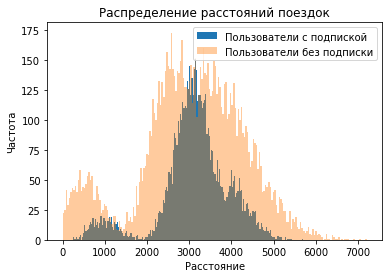

In [45]:
# Гистограмма для пользователей с подпиской
users_with_subscription['distance'].plot(kind='hist',
                                         bins=200,
                                         label='Пользователи с подпиской')

# Гистограмма для пользователей без подписки
users_no_subscription['distance'].plot(kind='hist',
                                       bins=200,
                                       alpha=0.4,
                                       label='Пользователи без подписки')

# Добавление подписей и легенды
plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояние')
plt.ylabel('Частота')
plt.legend()

# Показ графика
plt.show()

In [46]:
users_with_subscription['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [47]:
users_no_subscription['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

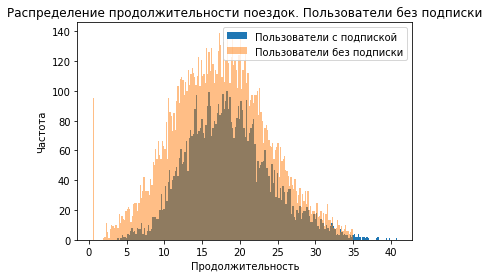

In [48]:
users_with_subscription['duration'].plot(kind='hist',
                      title='Распределение продолжительности поездок. Пользователи с подпиской',
                      bins=200,
                      label='Пользователи с подпиской'
                      );
users_no_subscription['duration'].plot(kind='hist',
                      title='Распределение продолжительности поездок. Пользователи без подписки',
                      bins=200,
                      alpha=0.5,
                      label='Пользователи без подписки'
                      );
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [49]:
users_with_subscription['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [50]:
users_no_subscription['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

**Вывод:**  
В результате отдельной визуализации данных пользователей с подпиской и без, было выявлено следующее:  
1. Распределение расстояний поездок для пользователей с подпиской имеет два пика. Первый пик со средним значением в 1 км имеет примерно 20 поездок из выборки. Второй пик со средним значением 3-3.2 км чуть больше 140 поездок из выборки.
2. Распределение продолжительности поездок для пользователей с подпиской имеет нормальное распределение со средним значением в 19 минут для 100 поездок.
3. Распределение расстоянии поездок для пользователей без подписки имеет два пика. Первый пик со средним значением в 500 м имеет примерно 55 поездок из выборки. Второй пик со средним значением 2.5 км чуть больше 170 поездок из выборки
4. Распределение продолжительности поездок для пользователей с подпиской имеет нормальное распределение с одним выбросом в 1 минуту. Нормальное распределение имеет среднее значение в 18 минут для 140 поездок.

   Поездки на большие расстояния пользуются популярностю у пользователей с подпиской. А вот продолжительность поездки у обеих групп практически одинаковая, за исключением того, что у пользователей без подписки имеется выбросом меньше 1 минуты для 100 поездок. В общем по гистограмме видно, что пользователей без подписки больше, чем с подпиской.

#### Шаг 5. Подсчёт выручки

**Изменим в таблице `full_data` тип `float` в столбце `duration` на `int`**

In [51]:
full_data['duration'] = np.ceil(full_data['duration']).astype(int)
full_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199


**Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

In [52]:
users_grouped = full_data.pivot_table(
                            index=['user_id', 'month'],
                            values=['distance', 'duration', 'start_ride_price', 'minute_price', 'subscription_fee'],
                            aggfunc={'distance': 'sum', 'duration': 'sum', 'start_ride_price': 'first', 
                                     'minute_price': 'first', 
                                     'subscription_fee': 'first' ,'user_id': 'count'}
                )
users_grouped.head()

distance  duration  minute_price  start_ride_price  \
user_id month                                                          
1       1      7027.511294        42             6                 0   
        4       754.159807         7             6                 0   
        8      6723.470560        46             6                 0   
        10     5809.911100        32             6                 0   
        11     7003.499363        56             6                 0   

               subscription_fee  user_id  
user_id month                             
1       1                   199        2  
        4                   199        1  
        8                   199        2  
        10                  199        2  
        11                  199        3

**Переименуем столбцы и сбросим индекс**

In [53]:
users_grouped = users_grouped.rename(columns={
    'distance': 'total_distance', 
    'duration': 'total_duration',
    'user_id': 'ride_count'
})
users_grouped = users_grouped.reset_index()
users_grouped.head()

,user_id,month,total_distance,total_duration,minute_price,start_ride_price,subscription_fee,ride_count
0,1,1,7027.511294,42,6,0,199,2
1,1,4,754.159807,7,6,0,199,1
2,1,8,6723.470560,46,6,0,199,2
3,1,10,5809.911100,32,6,0,199,2
4,1,11,7003.499363,56,6,0,199,3


**Добавим столбец с месячной выручкой от каждого пользователя**

In [54]:
users_grouped['monthly_income'] = (users_grouped['start_ride_price'] * users_grouped['ride_count'] 
                                   + users_grouped['minute_price'] * users_grouped['total_duration'] 
                                   + users_grouped['subscription_fee']
                                  )
users_grouped.head()

,user_id,month,total_distance,total_duration,minute_price,start_ride_price,subscription_fee,ride_count,monthly_income
0,1,1,7027.511294,42,6,0,199,2,451
1,1,4,754.159807,7,6,0,199,1,241
2,1,8,6723.470560,46,6,0,199,2,475
3,1,10,5809.911100,32,6,0,199,2,391
4,1,11,7003.499363,56,6,0,199,3,535


In [55]:
users_grouped['subscription_fee'].unique()

array([199,   0])

In [56]:
users_grouped['monthly_income'].describe()

count    11331.000000
mean       342.303504
std        153.875346
min         58.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: monthly_income, dtype: float64

**Вывод:**  
Для подсчета выручки от каждого пользователя, были проведены следующие действия: 

    - Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными: найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
    - Преобразован тип данных float столбца duration в тип int.
    - Добавлен столбец с месячной выручкой от каждого пользователя.  
Минимальная месячная выручка составляет 58р, максимальная - 1444р, а средняя выручка по всем пользователям равна 319р.

#### Шаг 6. Проверка гипотез

**6.1 Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки. Тратят ли пользователи с подпиской больше времени на поездки? Сформулируем нулевую гипотезу так - H<sub>0</sub> = Среднее время поездки у пользователей с подпиской и без подписки одинаковое. H<sub>1</sub>= Среднее время на поездку для пользователей с подпиской больше, чем среднее время на поездку для пользователей без подписки.**

In [57]:
#уровень статистической значимости
alpha = 0.05
results = st.ttest_ind(
    users_with_subscription['duration'],
    users_no_subscription['duration'],
    alternative='greater'
)
print('p-значение:', results.pvalue)

#вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:**
 Гипотеза о равенстве среднего времени поездки у пользователей с подпиской и без подписки была отвергнута. По результатам проведенного t-теста можно утверждать, что пользователи с подпиской действительно тратят больше времени на поездки, чем пользователи без подписки. Альтернативная гипотеза, что среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки, подтверждается.

**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Гипотеза - Среднее расстояние одной поездки для пользователей с подпиской не превышает 3130 метров. H<sub>0</sub> = среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равна 3130 метров. H<sub>1</sub> =  Среднее расстояние поездки для пользователей с подпиской больше 3130 метров.**

In [58]:
print('Среднее выборки:', users_with_subscription['distance'].mean())
value = 3130
#уровень статистической значимости
alpha = 0.05
results = st.ttest_1samp(
    users_with_subscription['distance'], 
    value,
    alternative='greater'
)
print('p-значение:', results.pvalue)

#вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее выборки: 3115.4453880370247
p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
Выборочное среднее равно 3115.445м и отличается от 3130м - предложенного в нулевой гипотезе значения. Но это отличие недостаточно велико, чтобы сделать вывод о том, что истинное среднее ГС отличается от 3130м. Таким образом, гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равна 3130 метров или больше не отвергаем.

**6.3 Гипотеза - Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.  H<sub>0</sub> = помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки. H<sub>1</sub> = Помесячная выручка от пользователей с подпиской больше выручки от пользователей без подписки.**

In [59]:
ultra = users_grouped.query('subscription_fee == 199')
free = users_grouped.query('subscription_fee == 0')

In [60]:
print('Среднее выборки пользователей с подпиской:', ultra['monthly_income'].mean())
print('Среднее выборки пользователей без подписки:', free['monthly_income'].mean())
#уровень статистической значимости
alpha = 0.05
results = st.ttest_ind(
    ultra['monthly_income'],
    free['monthly_income'],
    alternative='greater'
)
print('p-значение:', results.pvalue)

#вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее выборки пользователей с подпиской: 362.7921906022502
Среднее выборки пользователей без подписки: 328.6413651073845
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:** 
Так как p-значение значительно меньше статистической значимости 0.05, нулевая гипотеза отвергается. Можно сделать вывод, что пользователи с подпиской приносят в среднем больший доход по сравнению с пользователями без подпиской

**6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобился бы для проверки этой гипотезы?**

Так как мы имеем дело с зависимыми выборками, то есть рассматривается одна и та же выборка и переменная - количество обращений, измерена два раза для одних и тех же пользователей, до и после обновления сервера, то нужно использовать двухвыборочный t-тест для зависимых выборок scipy.stats.ttest_rel. Аргументы: наборы данных - парные выборки до и после изменения.  
Так как выдвигается гипотеза о том, что количество обращений в техподдержку снизилось после обновления сервера, то это одностороння гипотеза. В параметре alternative нужно указать 'less'.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Подходит тест st.ttest_rel(). Но в задании еще написано: "Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось". Какая должна быть гипотеза, односторонняя или двухсторонняя? Какие должны быть аргументы в тесте, что нужно указать в alternative?

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>
готово

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Да, здесь левосторонняя гипотеза

**Вывод:**  
Были проверены следующие гипотезы:  

    - Тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки.  
    - Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
    - Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.  
    
Получены следующие результаты:    

    - Гипотеза, что среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки, подтверждается.
    - Гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров не отвергаем.
    - Пользователи с подпиской приносят в среднем больший доход по сравнению с пользователями без подпиской 

Также проанализирована гипотетическая ситуация: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобился бы для проверки этой гипотезы?  

В данном случае, сделан вывод: Так как мы имеем дело с зависимыми выборками, то есть рассматривается одна и та же выборка и переменная - количество обращений, измерена два раза для одних и тех же пользователей, до и после обновления сервера, то нужно использовать двухвыборочный t-тест для зависимых выборок scipy.stats.ttest_rel. Аргументы: наборы данных - парные выборки до и после изменения.  
Так как выдвигается гипотеза о том, что количество обращений в техподдержку снизилось после обновления сервера, то это одностороння гипотеза. В параметре alternative нужно указать 'less'.

#### Шаг 7. Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Минимальное количество промокодов, чтобы вероятность не выполнить план была ≈5%: 1161


/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


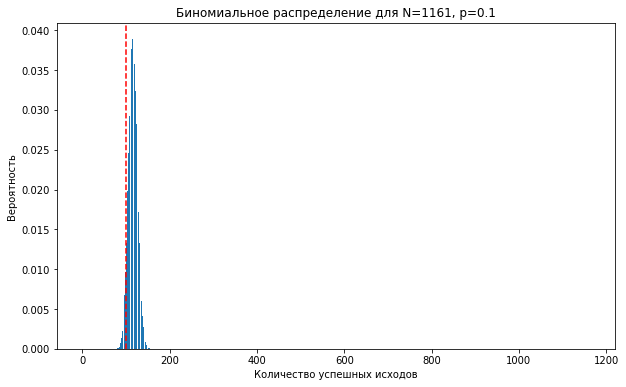

In [61]:
p = 0.1 # вероятность успеха
k=100 #количество успехов
N = 100
alpha = 0.05
distr = []

while True:
    # Рассчитываем вероятность того, что количество успехов будет меньше 100
    probability = binom.cdf(k - 1, N, p)
    
    # Проверяем, удовлетворяет ли это условие
    if probability <= alpha:
        break
    N += 1
    

print(f"Минимальное количество промокодов, чтобы вероятность не выполнить план была ≈5%: {N}")
distr = []

for i in range(0, N + 1):
    current_value = binom.pmf(i, N, p)
    distr.append(current_value)
    
plt.figure(figsize=(10, 6))    
plt.bar(range(0, N + 1), distr)
plt.xlabel('Количество успешных исходов')
plt.ylabel('Вероятность')
plt.title(f'Биномиальное распределение для N={N}, p={p}');
plt.axvline(k, color='red', linestyle='--')
plt.show()

**Вывод:**  
В результате проделанных операций, было выяснено, что минимальное количество промокодов, чтобы вероятность выполнить план была 95% - 1161 штук. Красная линия на графике показывает значение 100 продлений, а основная часть вероятности (больше 95%) лежит справа от этой линии, что означает, что в большинстве случаев число продлений будет больше или равно 100.

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

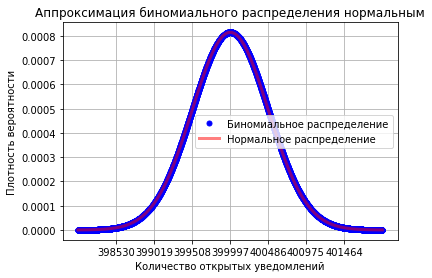

Условие выполняется


In [62]:
# Функция для создания массива значений
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    return [start + step * i for i in range(num)]

# Параметры биномиального распределения
n = 1000000
p = 0.4

# Параметры нормального распределения
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Границы промежутка для графика
left = int(mu - 4 * sigma)
right = int(mu + 4 * sigma)

# Значения для биномиального распределения
x = list(range(max(0, left), right + 1))

# Построение графика биномиального распределения
ax = plt.subplot()
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='Биномиальное распределение')

# Значения для нормального распределения
x = linspace(left, right, 100)
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.5, label='Нормальное распределение')

# Подписи по оси x
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma) + 1, int(sigma)))
ax.set_xticks(x_ticks)

# Настройка графика
ax.legend(loc='best')
plt.title('Аппроксимация биномиального распределения нормальным')
plt.xlabel('Количество открытых уведомлений')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.show()

# Проверка условия аппроксимации
if (mu - 3 * sigma >= 0) and (mu + 3 * sigma <= n):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

In [63]:
n = 1000000
p = 0.4

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399,5 тыс.
result = distr.cdf(399500)
result

0.15371708296369768

**Вывод:**  
В результате проделанных операций, было выяснено, что примерно 15.37% вероятности того, что количество открытий будет равна 399,5 тыс. или меньше. Значит, существует большая вероятность, что фактическое число открытий будет больше.

**Общий вывод:**  
В ходе анализа данных сервиса GoFast были проведены следующие операции:
1. Предобработка данных:
    - проверены столбцы таблиц на наличие пропущенных значений. Пропуски не обнаружены.  
    - проведен поиск дубликатов. Дубликаты строк найдены только в таблице users и удалены.  
    - таблице `rides` столбец `date` преобразован в тип дата и столбец `duration` в тип `int`.
2. Исследовательский анализ данных. Проверены определенные параметры таблиц, построены их гистограммы и сделаны следующие выводы:
    - *Частота встречаемости городов.* Величина является категориальной переменной, поэтому для нее построена столбчатая диаграмма. Выявлено, что в городе "Пятигорск" самое большое количество поездок - 219, а в городе "Москва" меньше - 168. Сервис больше всего популярен в городе "Пятигорск".
    - *Соотношение пользователей с подпиской и без подписки.* Для визуализации соотношения, построена диаграмма типа pie. Пользователей без подписки больше - примерно 54.43% от общего числа пользователей, пользователей с подпиской меньше - 45.57% от общего числа. Разница составляет 8.86%.
    - *Возраст пользователей.* Эта величина относится к количественной дискретной переменной. Для визуализации построена гистограмма. Гистограмма имеет нормальное распределение со средним значением в 25 лет, по обе строны от этого значения количество пользователей меньшего или большего возраста идет на спад. Основная масса пользователей находится в возрасте от 22-х до 28-ми лет.
    - *Расстояние поездки.* Эта величина относится к количественной непрерывной величине. Ее гистограмма напоминает нормальное распределение, но с двумя пиками. Среднее значение составляет 3.1 км примерно. Большое количество пользователей берут самокать для расстояний от 2.5км до 3.8км. Однако есть маленькие значения расстояний. Нужно будет выяснить, это ошибки в данных или все-таки есть пользователи, которые берут самокат на маленькие расстояния.
    - *Продолжительность поездки.* Эта величина относится к количественной непрерывной величине. Ее гистограмма имеет нормальное непрерыввное распределение с выбросом. Большинство поездок имеют интервал от 14 до 22 минут. Среднее значение примерно 18 минут. Однако можно заметить, что в данных есть короткие промежутки времени в 30 секунд. По таблице с отсортированным столбцом `duration` видно, что есть пользователи, которые за 30 секнд проезжают минимум 4030м. Это выглядит как аномалия, которая, вероятно, связана с ошибками в данных.

3. Объеденены данные из трех таблиц `users`, `rides`, `subscriptions`. Для выявления разницы в использовании сервиса, данные разделили на отдельные датафреймы с данными о пользователях с подпиской и без подписки. В результате отдельной визуализации данных, было выяснено следующее:  
    - Распределение расстояний поездок для пользователей с подпиской имеет два пика. Первый пик со средним значением в 1 км имеет примерно 20 поездок из выборки. Второй пик со средним значением 3-3.2 км чуть больше 140 поездок из выборки.
    - Распределение продолжительности поездок для пользователей с подпиской имеет нормальное распределение со средним значением в 19 минут для 100 поездок.
    - Распределение расстоянии поездок для пользователей без подписки имеет два пика. Первый пик со средним значением в 500 м имеет примерно 55 поездок из выборки. Второй пик со средним значением 2.5 км чуть больше 170 поездок из выборки
    - Распределение продолжительности поездок для пользователей с подпиской имеет нормальное распределение с одним выбросом меньше 1 минуты. Нормальное распределение имеет среднее значение в 18 минут для 140 поездок. 

   Поездки на большие расстояния пользуются популярностю у пользователей с подпиской. А вот продолжительность поездки у обеих групп практически одинаковая, за исключением того, что у пользователей без подписки имеется выброс меньше 1 минуты для 100 поездок. По гистограмме видно, что пользователей без подписки больше, чем с подпиской.

4. Подсчет выручки. Были проведены следующие действия:  
    - Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными: найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
    - Преобразован тип данных float столбца duration в тип int.
    - Добавлен столбец с месячной выручкой от каждого пользователя.  
Минимальная месячная выручка составляет 58р, максимальная - 1444р, а средняя выручка по всем пользователям равна 319р.

5. Проверка гипотез. Были проверены следующие гипотезы:

    - Тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки.  
    - Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
    - Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.  
    
Получены следующие результаты:    

    - Гипотеза, что среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки, подтверждается.
    - Гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров не отвергаем.
    - Пользователи с подпиской приносят в среднем больший доход по сравнению с пользователями без подпиской 

Также проанализирована гипотетическая ситуация: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобился бы для проверки этой гипотезы?  

В данном случае, сделан вывод: Так как мы имеем дело с зависимыми выборками, то есть рассматривается одна и та же выборка и переменная - количество обращений, измерена два раза для одних и тех же пользователей, до и после обновления сервера, то нужно использовать двухвыборочный t-тест для зависимых выборок scipy.stats.ttest_rel. Аргументы: наборы данных - парные выборки до и после изменения.  
Так как выдвигается гипотеза о том, что количество обращений в техподдержку снизилось после обновления сервера, то это одностороння гипотеза. В параметре alternative нужно указать 'less'.

6. Распределения. Были решены две задачи:
    1. Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.
       - В результате проделанных операций, построен график и было выяснено, что минимальное количество промокодов, чтобы вероятность выполнить план была 95% - 1161 штук. Красная линия на графике показывает значение 100 продлений, а основная часть вероятности (больше 95%) лежит справа от этой линии, что означает, что в большинстве случаев число продлений будет больше или равно 100.
    2. Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.
       - В результате проделанных операций, был построен график и было выяснено, что примерно 15.37% вероятности того, что количество открытий будет равна 399,5 тыс. или меньше. Значит, существует большая вероятность, что фактическое число открытий будет больше.

Пользователи с подпиской являются более выгодными для сервиса аренды самокатов по сравнению с пользователями без подписки. Подписчики не только тратят больше времени на поездки, но и приносят больше дохода.